<a href="https://colab.research.google.com/github/sumin2eee/cj-hackathon/blob/main/%ED%95%B4%EC%BB%A4%ED%86%A4_%ED%95%9C%EB%81%BC%ED%86%B5%EC%82%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 전처리

**0) 라이브러리 함수**

In [ ]:
!pip install konlpy

import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Okt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

okt= Okt()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 49.0 MB/s eta 0:00:00


**1) 데이터 로드**

In [ ]:
df=pd.read_csv('/content/hanggitongsalfinal.csv', encoding='utf-8')
df=df.dropna(axis = 0)
df

,ratings,reviews
0,5,가격대비 맛있습니다.
1,5,가격대비 맛있습니다.
2,5,포장도좋고 신선도도 좋아요
3,5,가격대비 만족합니다.
4,5,저 죄송한데 이거 왜 맛있어요?... 지금까지 닭가슴살의 편견이 엎어져서 저 지금 ...
...,...,...
1184,3,양념이 잘새는거같아요
1185,3,택배왔을때 양념이 터져있었어요
1186,3,안에 양념새는게좀있네요
1187,3,소스맛은 나쁘지않고 괜찮습니다.\n청양깻잎은 좀 퍽퍽하긴한데 \n가격대비 괜찮습니다~


**2) 훈련 데이터와 테스트 데이터 분리**

In [ ]:
df['label'] = np.select([df.ratings > 3], [1], default=0) # 평점으로 레이블 부여
df

,ratings,reviews,label
0,5,가격대비 맛있습니다.,1
1,5,가격대비 맛있습니다.,1
2,5,포장도좋고 신선도도 좋아요,1
3,5,가격대비 만족합니다.,1
4,5,저 죄송한데 이거 왜 맛있어요?... 지금까지 닭가슴살의 편견이 엎어져서 저 지금 ...,1
...,...,...,...
1184,3,양념이 잘새는거같아요,0
1185,3,택배왔을때 양념이 터져있었어요,0
1186,3,안에 양념새는게좀있네요,0
1187,3,소스맛은 나쁘지않고 괜찮습니다.\n청양깻잎은 좀 퍽퍽하긴한데 \n가격대비 괜찮습니다~,0


In [ ]:
df['ratings'].nunique(), df['reviews'].nunique(), df['label'].nunique() # 중복을 제외한 샘플의 수 카운트

(5, 735, 2)

In [ ]:
df.drop_duplicates(subset=['reviews'], inplace=True) # reviews 열에서 중복인 내용이 있다면 중복 제거
print('총 샘플의 수 :',len(df))

총 샘플의 수 : 735


In [ ]:
print(df.isnull().values.any()) # null 값 유무 확인

False


In [ ]:
train_data, test_data = train_test_split(df, test_size = 0.25, random_state = 42) # 훈련용, 테스트용 3:1 비율로 분리
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 551
테스트용 리뷰의 개수 : 184


**3) 레이블의 분포 확인**

<Axes: >

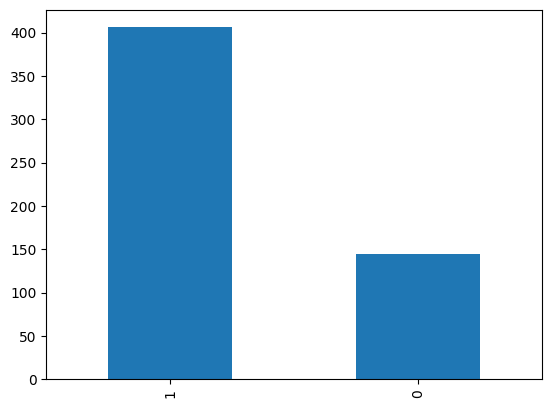

In [ ]:
train_data['label'].value_counts().plot(kind = 'bar') # 훈련 데이터 레이블 분포 확인

In [ ]:
print(df.groupby('label').size().reset_index(name = 'count')) # 80(긍):20(부) 비율

   label  count
0      0    191
1      1    544


**4) 데이터 정제**

In [ ]:
# 한글과 공백을 제외하고 모두 제거
train_data['reviews'] = train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data['reviews'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

ratings    0
reviews    0
label      0
dtype: int64


<ipython-input-10-5c91c21161d5>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['reviews'] = train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [ ]:
test_data.drop_duplicates(subset = ['reviews'], inplace=True) # 중복 제거
test_data['reviews'] = test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['reviews'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 184


<ipython-input-11-5968a3f5f2bc>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['reviews'] = test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행


**5) 토큰화**

In [ ]:
stopwords = ['요', '으로', '로', '도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

# 훈련 데이터
train_data['tokenized'] = train_data['reviews'].apply(okt.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [ ]:
# 테스트 데이터
test_data['tokenized'] = test_data['reviews'].apply(okt.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

**6) 단어와 길이 분포 확인**

In [ ]:
negative_words = np.hstack(train_data[train_data.label == 0]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)

In [ ]:
# 부정 리뷰에는 주로 어떤 단어들이 등장하는 지
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

[('맛', 62), ('포장', 29), ('소스', 24), ('좀', 24), ('주문', 21), ('너무', 20), ('안', 20), ('배송', 19), ('냉동', 19), ('별로', 19), ('닭', 17), ('개', 16), ('제품', 15), ('먹어', 14), ('것', 14), ('양념', 13), ('왔어요', 12), ('했는데', 12), ('잘', 12), ('하고', 12)]


In [ ]:
# 긍정 리뷰에는 주로 어떤 단어들이 등장하는 지
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[('맛', 126), ('맛있어요', 102), ('닭', 70), ('가슴', 69), ('살', 54), ('잘', 52), ('좋아요', 46), ('배송', 43), ('너무', 38), ('진짜', 28), ('구매', 27), ('만', 26), ('또', 24), ('먹고', 24), ('맛있고', 24), ('먹어', 24), ('시켜', 20), ('주문', 20), ('소스', 20), ('중', 20)]


긍정 리뷰의 평균 길이 : 8.62807881773399
부정 리뷰의 평균 길이 : 15.806896551724138


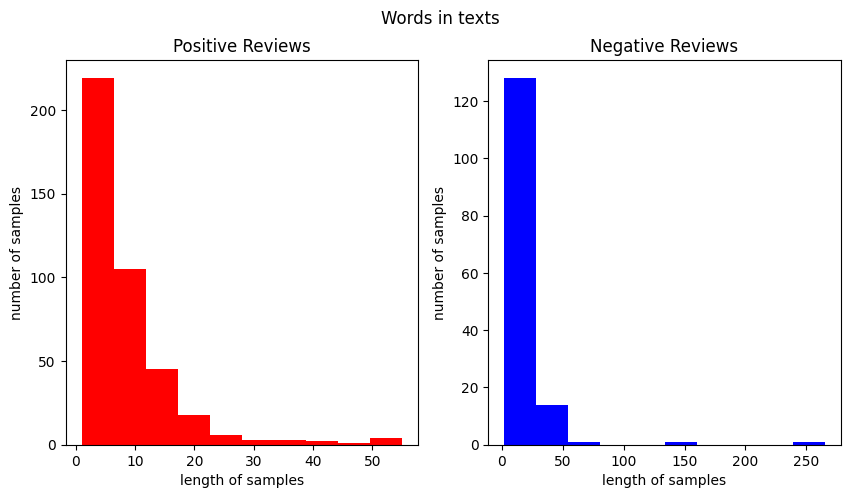

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

*긍정 리뷰보다 부정 리뷰가 조금 더 길게 작성된 경향이 있다.*

In [ ]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values

**7) 정수 인코딩**

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 1954
등장 빈도가 1번 이하인 희귀 단어의 수: 1230
단어 집합에서 희귀 단어의 비율: 62.94779938587512
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 21.225194132873167


In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 726


In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_train[:3])

[[451, 19, 38, 19, 110, 156, 320, 452, 1, 45, 321, 239], [240, 90, 9, 322], [38, 111, 17, 1, 157, 1, 1]]


In [ ]:
print(X_test[:3])

[[46, 1, 55, 34, 1, 239], [38, 149, 65, 1, 1, 65, 15, 1, 42, 17, 23, 1, 654, 103, 72, 340, 1, 93, 31, 27, 247, 1, 84, 1, 58, 553, 17, 77, 120, 36, 1, 1, 65, 1, 229, 180, 323, 1, 31, 1, 1, 31, 80, 33, 65, 2, 77, 20, 1, 65, 12, 1, 355, 161, 474, 1, 1, 1, 20, 1, 1, 192, 32, 1, 1, 1, 69, 1, 70, 64, 1, 3, 48, 1, 4, 5, 8, 25, 45, 3], [1, 359, 1, 1, 565, 17, 1, 237, 38, 1, 1, 721, 1, 1, 1, 80, 2, 16, 1, 615, 57, 1, 1, 434, 1, 73, 119, 45, 457, 1]]


**8) 패딩**

리뷰의 최대 길이 : 265
리뷰의 평균 길이 : 10.517241379310345


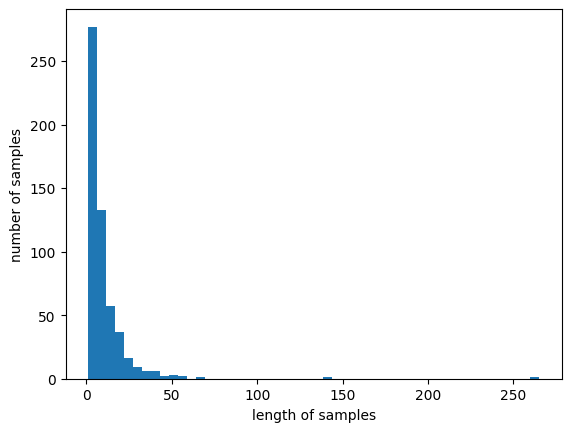

In [ ]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [ ]:
max_len = 50
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 50 이하인 샘플의 비율: 98.72958257713249


In [ ]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# 모델학습

**1) GRU**

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 0.6534 - acc: 0.6773
Epoch 1: val_acc improved from -inf to 0.84685, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7/7 [==============================] - 5s 380ms/step - loss: 0.6534 - acc: 0.6773 - val_loss: 0.5385 - val_acc: 0.8468
Epoch 2/15
7/7 [==============================] - ETA: 0s - loss: 0.5951 - acc: 0.7091
Epoch 2: val_acc did not improve from 0.84685
7/7 [==============================] - 1s 115ms/step - loss: 0.5951 - acc: 0.7091 - val_loss: 0.4842 - val_acc: 0.8468
Epoch 3/15
7/7 [==============================] - ETA: 0s - loss: 0.5636 - acc: 0.7091
Epoch 3: val_acc did not improve from 0.84685
7/7 [==============================] - 1s 113ms/step - loss: 0.5636 - acc: 0.7091 - val_loss: 0.4353 - val_acc: 0.8468
Epoch 4/15
7/7 [==============================] - ETA: 0s - loss: 0.5176 - acc: 0.7136
Epoch 4: val_acc did not improve from 0.84685
7/7 [==============================] - 1s 117ms/step - loss: 0.5176 - acc: 0.7136 - val_loss: 0.3983 - val_acc: 0.8468
Epoch 5/15
7/7 [==============================] - ETA: 0s - loss: 0.4624 - acc: 0.7636
Epoch 5: val_acc improved from 0.84685

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

6/6 [==============================] - 1s 27ms/step - loss: 0.3967 - acc: 0.8587

 테스트 정확도: 0.8587


**2) LSTM**

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
7/7 [==============================] - ETA: 0s - loss: 0.6395 - acc: 0.6864
Epoch 1: val_acc improved from -inf to 0.84685, saving model to best_model.h5
7/7 [==============================] - 4s 309ms/step - loss: 0.6395 - acc: 0.6864 - val_loss: 0.5141 - val_acc: 0.8468
Epoch 2/15
7/7 [==============================] - ETA: 0s - loss: 0.5807 - acc: 0.7182
Epoch 2: val_acc did not improve from 0.84685
7/7 [==============================] - 1s 137ms/step - loss: 0.5807 - acc: 0.7182 - val_loss: 0.4537 - val_acc: 0.8468
Epoch 3/15
7/7 [==============================] - ETA: 0s - loss: 0.5682 - acc: 0.7250
Epoch 3: val_acc improved from 0.84685 to 0.86486, saving model to best_model.h5
7/7 [==============================] - 1s 148ms/step - loss: 0.5682 - acc: 0.7250 - val_loss: 0.4495 - val_acc: 0.8649
Epoch 4/15
7/7 [==============================] - ETA: 0s - loss: 0.5447 - acc: 0.7364
Epoch 4: val_acc did not improve from 0.86486
7/7 [==============================] - 1s 14

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

6/6 [==============================] - 1s 28ms/step - loss: 0.3589 - acc: 0.8478

 테스트 정확도: 0.8478


**3) Transformer**

# 시각화


In [ ]:
word_dict_negative = dict(negative_word_count.most_common(50)) # 딕셔너리 형태로 변경
word_dict_negative

{'맛': 62,
 '포장': 29,
 '소스': 24,
 '좀': 24,
 '주문': 21,
 '너무': 20,
 '안': 20,
 '배송': 19,
 '냉동': 19,
 '별로': 19,
 '닭': 17,
 '개': 16,
 '제품': 15,
 '먹어': 14,
 '것': 14,
 '양념': 13,
 '왔어요': 12,
 '했는데': 12,
 '잘': 12,
 '하고': 12,
 '문의': 12,
 '저': 11,
 '상태': 11,
 '생각': 11,
 '만': 11,
 '확인': 10,
 '가슴': 10,
 'ㅠ': 10,
 '리뷰': 10,
 '제': 9,
 '합니다': 9,
 'ㅠㅠ': 9,
 '하나': 8,
 '전화': 8,
 '그냥': 8,
 '보다': 8,
 '적': 8,
 '정도': 7,
 '녹아서': 7,
 '좋아요': 7,
 '재': 7,
 '냉장': 7,
 '이런': 7,
 '에서': 7,
 '다른': 7,
 '보관': 7,
 '살': 7,
 '같습니다': 7,
 '해동': 7,
 '이건': 7}

In [ ]:
word_dict_positive = dict(positive_word_count.most_common(50)) # 딕셔너리 형태로 변경
word_dict_positive

{'맛': 126,
 '맛있어요': 102,
 '닭': 70,
 '가슴': 69,
 '살': 54,
 '잘': 52,
 '좋아요': 46,
 '배송': 43,
 '너무': 38,
 '진짜': 28,
 '구매': 27,
 '만': 26,
 '또': 24,
 '먹고': 24,
 '맛있고': 24,
 '먹어': 24,
 '시켜': 20,
 '주문': 20,
 '소스': 20,
 '중': 20,
 '부드럽고': 20,
 '다이어트': 20,
 '입니다': 19,
 '빠르고': 19,
 '먹기': 19,
 '끼통살': 18,
 '것': 17,
 '밥': 17,
 '있어요': 17,
 '많이': 17,
 '제일': 16,
 '항상': 16,
 'ㅎㅎ': 16,
 '거': 15,
 '추천': 14,
 '살이': 14,
 '맛있어서': 14,
 '떡볶이': 14,
 '않고': 13,
 '맛있게': 13,
 '이랑': 13,
 'ㅠ': 13,
 '맛있습니다': 13,
 '여기': 12,
 '안': 12,
 '재구매': 12,
 '포장': 12,
 '다른': 11,
 '좀': 11,
 '먹으면': 11}

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from PIL import Image

In [ ]:
from wordcloud import STOPWORDS
# 추가할 불용어를 리스트 형태로 추가함.

In [ ]:
# 워드 클라우드 세팅
# 한글폰트 경로 설정
wc = WordCloud (max_words=50,
           random_state= 810,
           background_color='white',
           font_path= '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
           )

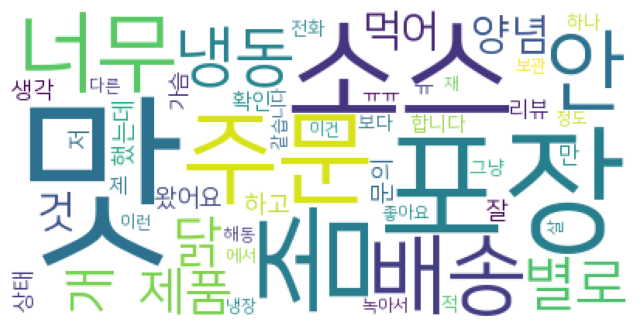

In [ ]:
wc = WordCloud (max_words=100,
           background_color='white',
           font_path= '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf'
           )
wc.generate_from_frequencies(word_dict_negative)
plt.figure(figsize=(8,8))
plt.imshow(wc)
plt.axis('off')
plt.savefig('부정리뷰.png') #그림을 저장
plt.show()

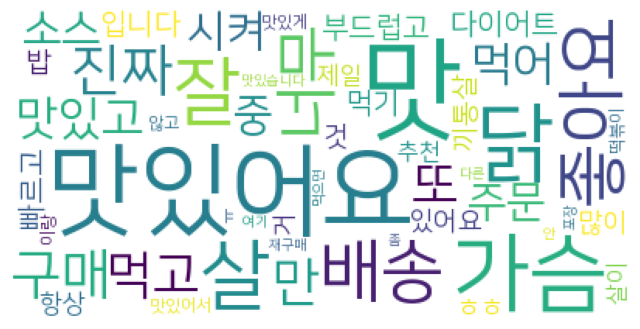

In [ ]:
wc = WordCloud (max_words=100,
           background_color='white',
           font_path= '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf'
           )
wc.generate_from_frequencies(word_dict_positive)
plt.figure(figsize=(8,8))
plt.imshow(wc)
plt.axis('off')
plt.savefig('긍정리뷰.png') #그림을 저장
plt.show()